<a href="https://colab.research.google.com/github/shynipragasam/Model-interpretability-/blob/main/Imbalance_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Addressing imbalanced classes

In [ ]:
def disease_screen(patient_data):
    # Ignore patient_data
    return 'No Disease.'

unbalanced class psychological experiment results

In [ ]:
import pandas as pd
import numpy as np
 
# Read dataset
df = pd.read_csv('/content/balance-scale.data', names=['balance', 'var1', 'var2', 'var3', 'var4'])
 
# Display example observations
df.head()

,balance,var1,var2,var3,var4
0,B,1,1,1,1
1,R,1,1,1,2
2,R,1,1,1,3
3,R,1,1,1,4
4,R,1,1,1,5


The dataset contains information about whether a scale is balanced or not, based on weights and distances of the two arms.

It has 1 target variable, which we’ve labeled balance .
It has 4 input features, which we’ve labeled var1  through var4 .

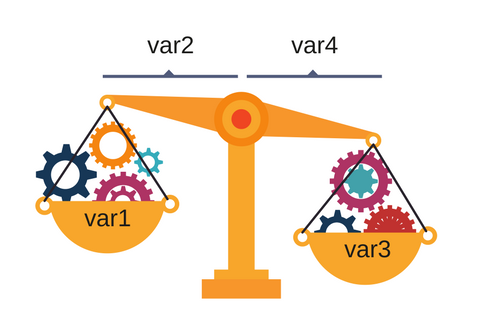


The target variable has 3 classes.

R for right-heavy, i.e. when var3 * var4 > var1 * var2
L for left-heavy, i.e. when var3 * var4 < var1 * var2
B for balanced, i.e. when var3 * var4 = var1 * var2

In [ ]:
df['balance'].value_counts()


Turn this into a binary classification problem

label each observation as 1 (positive class) if the scale is balanced or 0 (negative class) if the scale is not balanced:

In [ ]:
# Transform into binary classification
df['balance'] = [1 if b=='B' else 0 for b in df.balance]
 


In [ ]:
df['balance'].value_counts()

0    576
1     49
Name: balance, dtype: int64

problem of imbalanced classes

import the Logistic Regression algorithm and the accuracy metric from Scikit-Learn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

machine learning algorithms are designed to maximize overall accuracy by default

In [ ]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_0 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_0 = clf_0.predict(X)

In [ ]:
#What is the accuracy?
print( accuracy_score(pred_y_0, y) )

0.9216


model has 92% overall accuracy, but is it because it’s predicting only 1 class?

In [ ]:
# Should we be excited?
print( np.unique( pred_y_0 ) )

This model is only predicting 0, which means it’s completely ignoring the minority class in favor of the majority class.

FIVE technique for handling imbalanced classes: 
1. up-sampling the minority class
2. Down-sample Majority Class
3. Change Your Performance Metric
4. Penalize Algorithms (Cost-Sensitive Training)
5. Use Tree-Based Algorithms

use SMOTE, Kappa 

1. up-sampling/over sampling  the minority class - duplicating observations from the minority class

In [ ]:
from sklearn.utils import resample

create a new DataFrame with an up-sampled minority class

1.   First,  separate observations from each class into different DataFrames.
2.   Next,  resample the minority class with replacement, setting the number of samples to match that of the majority class.
3. Finally,  combine the up-sampled minority class DataFrame with the original majority class DataFrame.



In [ ]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 

In [ ]:
# Upsample minority class
df_minority_upsampled = resample(df_minority, replace=True, n_samples=576, random_state=123) 
                                  # sample with replacement  # to match majority class   # reproducible results

In [ ]:
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

In [ ]:
# Display new class counts
df_upsampled.balance.value_counts()

New DataFrame has more observations than the original, and the ratio of the two classes is now 1:1

Train another model using Logistic Regression, this time on the balanced dataset:

In [ ]:
# Separate input features (X) and target variable (y)
y = df_upsampled.balance
X = df_upsampled.drop('balance', axis=1)
 

In [ ]:
# Train model
clf_1 = LogisticRegression().fit(X, y)

In [ ]:
# Predict on training set
pred_y_1 = clf_1.predict(X)

In [ ]:
# Is our model still predicting just one class?
print( np.unique( pred_y_1 ) )

[0 1]


In [ ]:
# our accuracy?
print( accuracy_score(y, pred_y_1) )

model is no longer predicting just one class.While the accuracy also took a nosedive, it’s now more meaningful as a performance metric.

Down-sample Majority Class:randomly removing observations from the majority class

1. First, separate observations from each 
class into different DataFrames.
2. Next, resample the majority class without replacement, setting the number of samples to match that of the minority class.
3. Finally,combine the down-sampled majority class DataFrame with the original minority class DataFrame.





In [ ]:
# Separate majority and minority classes
df_majority = df[df.balance==0]
df_minority = df[df.balance==1]
 

In [ ]:
# Downsample majority class
df_majority_downsampled = resample(df_majority,replace=False, n_samples=49,random_state=123) 
  # sample without replacement  # to match minority class  # reproducible results

In [ ]:
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 

In [ ]:
# Display new class counts
df_downsampled.balance.value_counts()

The new DataFrame has fewer observations than the original, and the ratio of the two classes is now 1:1.

Train a model using Logistic Regression

In [ ]:
# Separate input features (X) and target variable (y)
y = df_downsampled.balance
X = df_downsampled.drop('balance', axis=1)
 
# Train model
clf_2 = LogisticRegression().fit(X, y)
 
# Predict on training set
pred_y_2 = clf_2.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_2 ) )
print( accuracy_score(y, pred_y_2) )

Accuracy seems higher . But validate the model on an unseen test dataset


3. Change Your Performance Metric

There are two ways of addressing imbalanced classes
    by resampling the dataset. 
    
    Next, using other performance metrics for evaluating the models.

**AUC** = Area Under the Curve.
**AUROC** = Area Under the Receiver Operating Characteristic curve.

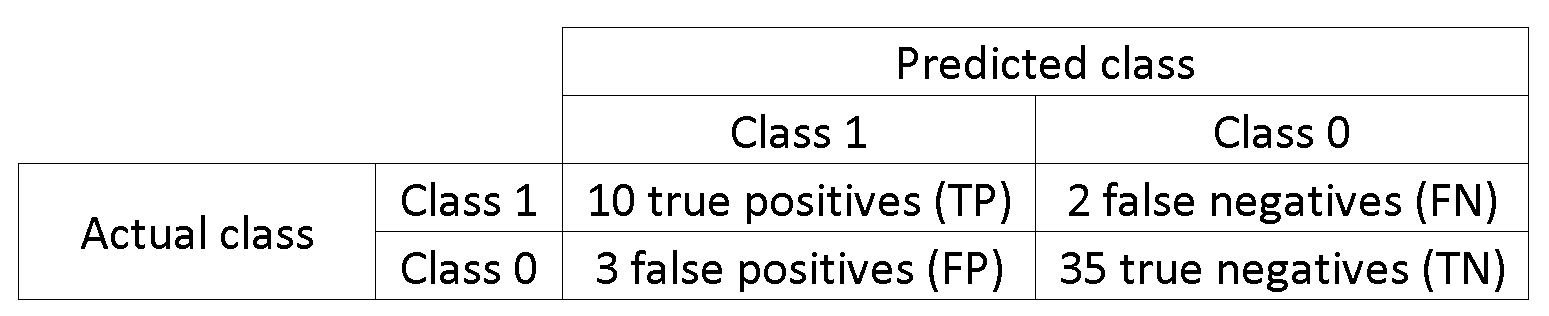

In this example of a confusion matrix, among the 50 data points that are classified, 45 are correctly classified and the 5 are misclassified.

True positive rate (TPR), aka. sensitivity, hit rate, and recall, which is defined as TP/TP+FN. Intuitively this metric corresponds to the proportion of positive data points that are correctly considered as positive, with respect to all positive data points. In other words, the higher TPR, the fewer positive data points we will miss.
False positive rate (FPR), aka. fall-out, which is defined as FP/FP+TN. Intuitively this metric corresponds to the proportion of negative data points that are mistakenly considered as positive, with respect to all negative data points. In other words, the higher FPR, the more negative data points will be missclassified.

To combine the FPR and the TPR into one single metric.
Plot a single graph with FPR values on the abscissa and the TPR values on the ordinate

The resulting curve is called ROC curve, and the metric we consider is the AUC of this curve, which we call AUROC.

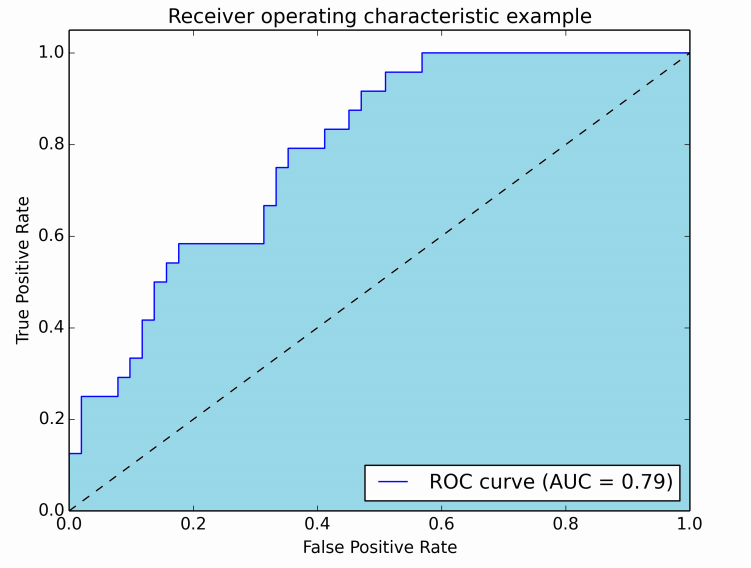


In this figure, the blue area corresponds to the Area Under the curve of the Receiver Operating Characteristic (AUROC). The dashed line in the diagonal we present the ROC curve of a random predictor: it has an AUROC of 0.5. The random predictor is commonly used as a baseline to see whether the model is useful.

use this link to study more on

 https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

In [ ]:
#if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?
#import this metric from Scikit-Learn

In [ ]:

from sklearn.metrics import roc_auc_score

use predicted class probabilities instead of just the predicted classes

In [ ]:
# Predict class probabilities
prob_y_2 = clf_2.predict_proba(X)
 
# Keep only the positive class
prob_y_2 = [p[1] for p in prob_y_2]
 
prob_y_2[:5]

In [ ]:
print( roc_auc_score(y, prob_y_2) )

how does this compare to the original model trained on the imbalanced dataset?

In [ ]:
prob_y_0 = clf_0.predict_proba(X)
prob_y_0 = [p[1] for p in prob_y_0]
 
print( roc_auc_score(y, prob_y_0) )

original model trained on the imbalanced dataset had an accuracy of 92%, which is much higher than the 58% accuracy of the model trained on the down-sampled dataset.

However, the latter model has an AUROC of 56.5%, which is higher than the 52.4% of the original model (but not by much).

Note: if you got an AUROC of 0.476 instead, it just means you need to invert the predictions because Scikit-Learn is misinterpreting the positive class. AUROC should always be >= 0.5, so the actual AUROC is simply 1 – 0.476 = 0.524.

4. Penalize Algorithms (Cost-Sensitive Training)

use penalized learning algorithms that increase the cost of classification mistakes on the minority class.

Penalized-SVM

In [ ]:
from sklearn.svm import SVC

* Use the argument class_weight='balanced'  to penalize mistakes on the minority class.

* Include the argument probability=True  if we want to enable probability estimates for SVM algorithms

Train a model using Penalized-SVM on the original imbalanced dataset:

In [ ]:
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_3 = SVC(kernel='linear', class_weight='balanced', probability=True)
# penalize

In [ ]:
clf_3.fit(X, y)
 
# Predict on training set
pred_y_3 = clf_3.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_3 ) )

In [ ]:
#accuracy?
print( accuracy_score(y, pred_y_3) )

In [ ]:
# AUROC?
prob_y_3 = clf_3.predict_proba(X)
prob_y_3 = [p[1] for p in prob_y_3]
print( roc_auc_score(y, prob_y_3) )

5. Use Tree-Based Algorithms

Decision trees often perform well on imbalanced datasets because their hierarchical structure allows them to learn signals from both classes.
Tree ensembles (Random Forests, Gradient Boosted Trees, etc.) almost always outperform singular decision trees

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#train a model using a Random Forest on the original imbalanced dataset.
# Separate input features (X) and target variable (y)
y = df.balance
X = df.drop('balance', axis=1)
 
# Train model
clf_4 = RandomForestClassifier(random_state=123)
clf_4.fit(X, y)
 
# Predict on training set
pred_y_4 = clf_4.predict(X)
 
# Is our model still predicting just one class?
print( np.unique( pred_y_4 ) )
# [0 1]
 
#  accuracy?
print( accuracy_score(y, pred_y_4) )
# 1.0

In [ ]:
#  AUROC?
prob_y_4 = clf_4.predict_proba(X)
prob_y_4 = [p[1] for p in prob_y_4]
print( roc_auc_score(y, prob_y_4) )

100% accuracy and 100% AUROC  
Too good to be true?

Well, tree ensembles have become very popular because they perform extremely well on many real-world problems

*********************
Important

*********************
Create Synthetic Samples (Data Augmentation)
Creating synthetic samples is a close cousin of up-sampling, and some people might categorize them together.

the*** SMOTE*** algorithm is a method of resampling from the minority class 


Link :https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html


In [ ]:
from google.colab import drive
drive.mount('/content/drive')